In [1]:
import os
import sys
import tensorflow as tf
import numpy as np
import math
import timeit
import scipy

#import matplotlib.pyplot as plt
import CNet
import provider
import TR
#%matplotlib inline
USE_GPU = True

if USE_GPU:
    device = '/device:GPU:0'
else:
    device = '/cpu:0'

# Constant to control how often we print when training models
print_every = 100

print('Using device: ', device)

Using device:  /device:GPU:0


In [2]:
BATCH_SIZE=8
MAX_EPOCH=1
learning_rate = 3e-5
channel_1, channel_2,channel_3,channel_4, num_classes,c1,c2,c3,c4=64,128,256,512,2,64,128,256,512

def model_init_fn(inputs1,inputs2, is_training):
    model = None

    model = CNet.CentralNet(channel_1, channel_2,channel_3,channel_4, num_classes,c1,c2,c3,c4)

    return model(inputs1,inputs2)


#TR.train_part34(model_init_fn, optimizer_init_fn,5,device,BATCH_SIZE)

In [3]:
#tensorflow sucks
import evaluate
evaluate.Evaluate(model_init_fn,device,BATCH_SIZE)

Tensor("Placeholder_3:0", shape=(), dtype=bool, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from log/model_best.ckpt
Model restored.
eval mean loss: 0.158243
eval accuracy (angle-1): 0.098404
eval accuracy (speed-1): 0.167553
eval accuracy (angle-2): 0.199468
eval accuracy (speed-2): 0.315160
eval accuracy (angle-3): 0.316489
eval accuracy (speed-3): 0.456117
eval accuracy (angle-4): 0.408245
eval accuracy (speed-4): 0.566489
eval accuracy (angle-5): 0.470745
eval accuracy (speed-5): 0.647606
(752, 2) 0 120
(752, 2) 120 240
(752, 2) 240 360
(752, 2) 360 480
(752, 2) 480 591
(752, 2) 591 711
(752, 2) 711 752
eval error (mean-max): angle:33.79 speed:67.62
eval error (max): angle:42.49 speed:101.87
eval error (mean-top5): angle:36.93 speed:85.45
eval error (mean): angle:7.27 speed:5.66
(752, 2) (752, 2)


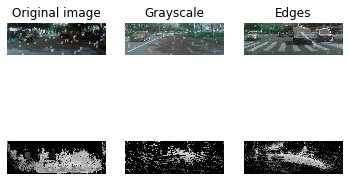

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import provider
%matplotlib inline

def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

data_input=provider.DVR_FMAP_Provider(status="snow")
imgs,fmaps,labels=data_input.load_one_batch(8,"val")
    
plt.subplot(2, 3, 1)
imshow_noax(imgs[3])
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_noax(imgs[1])
plt.title('Grayscale')
plt.subplot(2, 3, 3)
imshow_noax(imgs[2])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_noax(fmaps[3])
plt.subplot(2, 3, 5)
imshow_noax(fmaps[1])
plt.subplot(2, 3, 6)
imshow_noax(fmaps[2])
plt.show()